----- First 5 rows -----
          income  credit_score          debt  age  dependents  approved
0   87417.221393    516.499536  37364.081847   45           1         0
1  191128.575154    560.389613  33291.209623   39           4         1
2  151758.909526    770.001066  17615.391250   62           2         1
3  127758.527155    487.002412  60726.667010   33           3         0
4   48083.355280    778.307327  47662.416051   30           0         1

----- Metrics -----
Accuracy : 0.844
Precision: 0.8033333333333333
Recall   : 0.7130177514792899
F1 Score : 0.7554858934169278


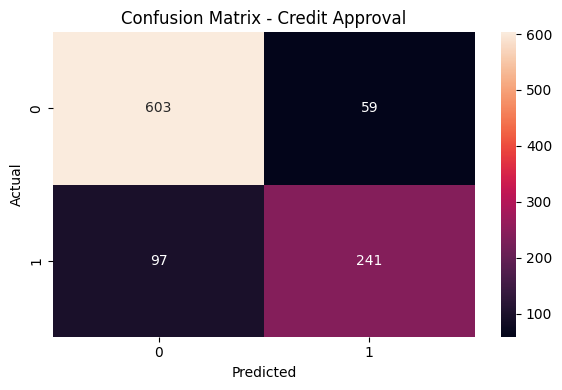

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix
)

# 1. Load the dataset
df = pd.read_csv("logistic_regression_credit_approval_5000.csv")

print("----- First 5 rows -----")
print(df.head())

# If you want, you can uncomment these:
# print("\n----- Dataset Info -----")
# print(df.info())

# print("\n----- Descriptive Statistics -----")
# print(df.describe())

# 2. Split features (X) and target (y) 
X = df[["income", "credit_score", "debt", "age", "dependents"]]

# Target: approved 
y = df["approved"]

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. Train the Logistic Regression model
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

# 5. Prediction
y_pred = model.predict(X_test)

# 6. Evaluation metrics
print("\n----- Metrics -----")
print("Accuracy :", accuracy_score(y_test, y_pred)) #for correct accuray
print("Precision:", precision_score(y_test, y_pred)) #for correct positive precision
print("Recall   :", recall_score(y_test, y_pred))   #for capturing actual positives
print("F1 Score :", f1_score(y_test, y_pred))       #balance between precision and recall

# 7. Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)  

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d') #color grid
plt.title('Confusion Matrix - Credit Approval')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()
